# Deflection by an ensemble of point masses

Using the linear dependence of the deflection angle on mass, we can use the superposition principle to compute the deflection angle of a light ray by an ensemble of point masses:

$$
\hat{\vec\alpha}(\xi)=\frac{4G}{c^2}\sum_i \frac{M_i}{|\vec\xi_i-\vec\xi|^2}(\vec\xi_i-\vec\xi)
$$

In the following example, we consider a random distribution of point masses and compute the direction and versus of the deflection angle vector of a light ray at the center of the lens plane.

For the moment, we can assume that all masses are equal. In addition, the deflection angle vector is scaled in such a way that its length is 0.1.

You can try to

* set the number of lenses to n=1. What are the direction and versus of $\hat{\vec\alpha}$?
* increase the number of lenses to see how the deflection angle changes.

[1.75119033]


(0, 1)

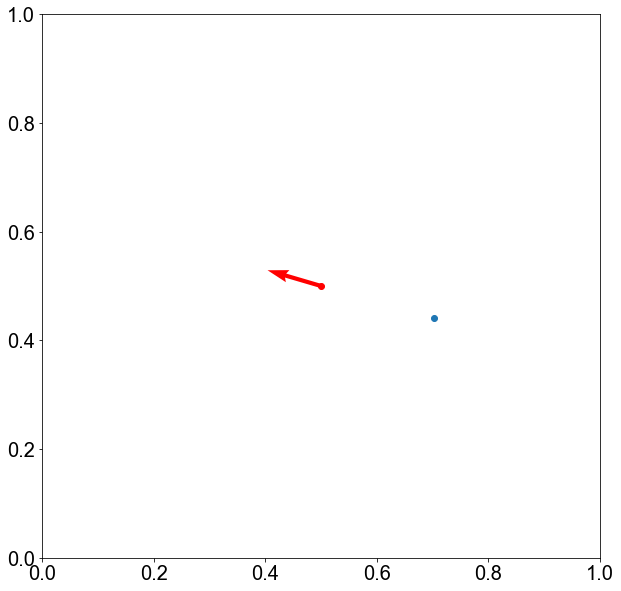

In [150]:
# generate a random distribution of point masses

import numpy.random as rn
from astropy import constants as const
from astropy import units as u


n=1
xi_1=rn.rand(n)*u.pc
xi_2=rn.rand(n)*u.pc
m=np.ones(n)*const.M_sun.to('kg')

# now set the ray position at (0.5,0.5)
xi_1r=0.5*u.pc
xi_2r=0.5*u.pc

# compute distances from xr,yr
xi1=(xi_1r-xi_1).to('m')
xi2=(xi_2r-xi_2).to('m')

print ((4.0*const.G/const.c**2*m/const.R_sun)*u.rad.to('arcsec'))#180.0/np.pi*3600.0)

rl2=(xi1**2+xi2**2).to('m2')
al1=4.0*const.G/const.c**2*m/rl2*xi1.sum()
al2=4.0*const.G/const.c**2*m/rl2*xi2.sum()
f=1.e-2/np.sqrt(al1**2+al2**2)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(xi_1,xi_2,'o',zorder=-1)
ax.plot(xi_1r,xi_2r,'o',color='red')
ax.quiver(xi_1r, xi_2r, al1*f, al2*f, color='r', scale=0.1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

In the next example, we generate many light rays and try to compute the deflection angle of each of them due to the distribution of $n$ lenses. Try to increase the number of the lenses and rays and see how the computational time increases. 

time of execution: 0.020025253295898438


(0, 1)

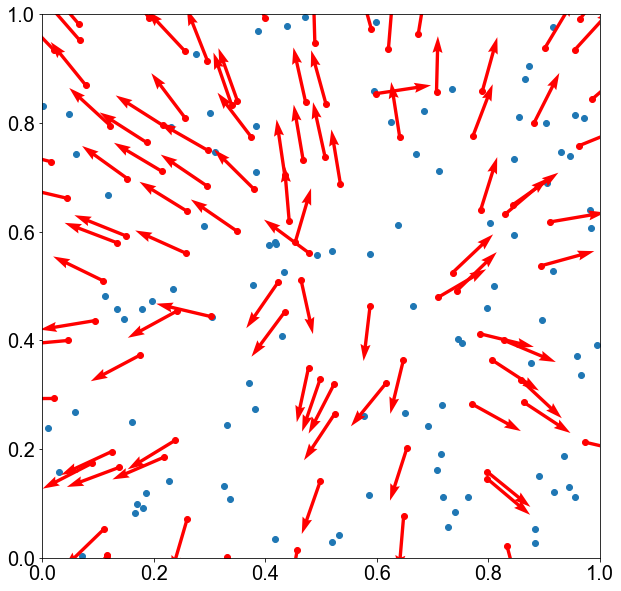

In [139]:
import time
# generate a random distribution of point masses
t1 = time.time()

import numpy.random as rn

n=100
xi_1=rn.rand(n)
xi_2=rn.rand(n)
m=np.ones(n)*const.M_sun.to('kg')

# now define the light ray positions
nr=100
xi_1r=rn.rand(nr)
xi_2r=rn.rand(nr)



fig,ax=plt.subplots(1,1,figsize=(10,10))
xi1 = np.array([[xi_1r[i]-xi_1[k] for i in range(nr)] for k in range(n)])
xi2 = np.array([[xi_2r[i]-xi_2[k] for i in range(nr)] for k in range(n)])

rl2=(xi1**2+xi2**2)*u.pc.to('m')
mass=np.array([m,]*nr).transpose()
al1=4.0*const.G/const.c**2*((mass/rl2*xi1).sum(axis=0))
al2=4.0*const.G/const.c**2*((mass/rl2*xi2).sum(axis=0))

al1=np.array(al1)
al2=np.array(al2)
f=1.e-2/np.sqrt(al1**2+al2**2)
print ("time of execution:", time.time() - t1)

ax.plot(xi_1,xi_2,'o',zorder=-1)
ax.plot(xi_1r,xi_2r,'o',color='red')
ax.quiver(xi_1r, xi_2r, al1*f, al2*f, color='r', scale=0.1)    
ax.set_xlim([0,1])
ax.set_ylim([0,1])

# Deflection of a photon by a Black Hole

Let's consider the case of a compact, static (non-rotating), spherically symmetric lens and compare its deflection angle in the strong field limit to the result derived in the weak field limit. 
![alt text](data/bozza.png)

The generic form of the metric for a spherically symmetric mass distribution is:
$$
ds^2=A(R)dt^2-B(R)dr^2-C(R)(d\theta^2+\sin^2\theta d\phi^2)
$$

[Bozza (2009)](http://arxiv.org/pdf/0911.2187v2.pdf) shows that the deflection angle of a photon with impact parameter $u$ (incoming and outgoing trajectories), passing at the minimum distance $R_m$ from the lens is:
$$
\hat\alpha(u)=-\pi+{2G}{c^2}\int_{R_m}^{\infty}u\sqrt{\frac{B(R)}{C(R)[C(R)/A(R)-u^2]}}dR \;.
$$

For the Schwarzchild metric (static, non-rotating, compact lens):
$$
A(R)=1-\frac{2GM}{c^2R}\;,
$$
$$
B(R)=A(R)^{-1} \;,
$$
and
$$
C(R)=R^2 \;.
$$

Using this metric, the formula for the deflection angle is:
$$
\hat{\alpha}=-\pi+4\frac{G}{c^2}\sqrt{R_m/s}F(\varphi,m)
$$
with
\begin{eqnarray}
s&=&\sqrt{(R_m-2M)(R_m+6M)} \\
m&=&(s-R_m+6M)/2s \\
\varphi &=& \arcsin{\sqrt{2s/(3R_m-6M+s)}}
\end{eqnarray}

$F(\varphi,m)$ is the elliptical integral of the first kind. The impact parameter $u$ is related to  $R_m$ via the equation.
$$
u^2=\frac{C(R_m)}{A(R_m)}
$$

In this example we will implement the formula above and we will compare the resulting deflection angle to 
$$
\hat\alpha=\frac{4GM}{c^2u} \;.
$$


We will need some special function from scipy in order to compute the elliptic integral of the first kind. See https://docs.scipy.org/doc/scipy/reference/special.html.

In [1]:
# need special functions for incomplete elliptic integrals of the first kind
from scipy import special as sy 
import numpy as np
import matplotlib.pyplot as plt

2.5980762113533156 2.598076211353316


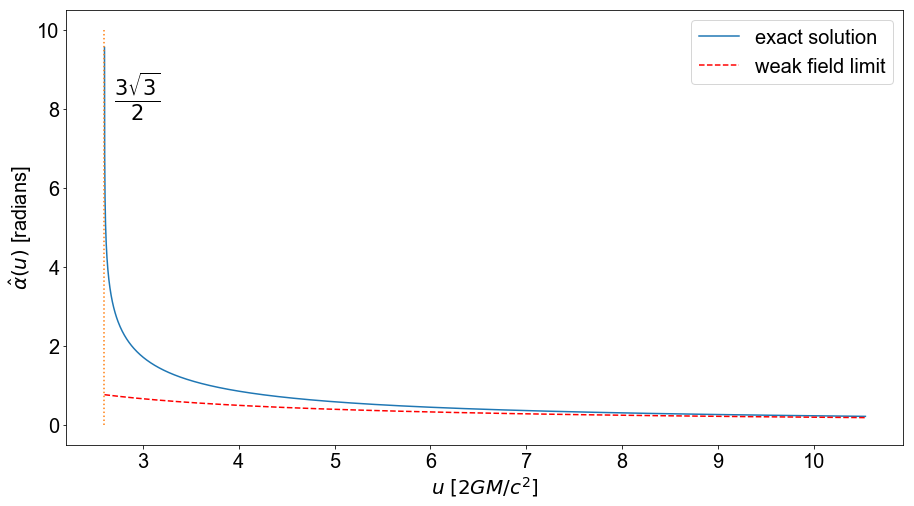

In [2]:
# our goal is to produce a graph. Let's setup the fonts and the character size
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 20}

import matplotlib
matplotlib.rc('font', **font)

# build a class for BH objects
class point_bh:
    
    def __init__(self,M):
        self.M=M
    
    # functions which define the metric. We need only A(r) and C(r) to compute u from rm
    def A(self,r):
        return(1.0-2.0*self.M/r)
    
    def B(self,r):
        return (self.A(r)**(-1))
    
    def C(self,r):
        return(r**2)
    
    # compute u from rm
    def u(self,r):
        u=np.sqrt(self.C(r)/self.A(r))
        return(u)
    
    # functions concurring to the deflection angle calculation
    def ss(self,r):
        return(np.sqrt((r-2.0*self.M)*(r+6.0*self.M)))
    
    def mm(self,r,s):
        return((s-r+6.0*self.M)/2/s)
    
    def phif(self,r,s):
        return(np.arcsin(np.sqrt(2.0*s/(3.0*r-6.0*self.M+s))))
    
    # the deflection angle
    def defAngle(self,r):
        s=self.ss(r)
        m=self.mm(r,s)
        phi=self.phif(r,s)
        F=sy.ellipkinc(phi, m) ## using the ellipkinc function from scipy.special
        return(-np.pi+4.0*np.sqrt(r/s)*F)

# build a class for point mass lenses implementing the results in the weak field limit    
class point_mass:
    
    def __init__(self,M):
        self.M=M
    
    # the classical formula
    def defAngle(self,u):
        return(4.0*self.M/u)
    

# construct a BH and a PM objects. The mass is fixed to 3 Msun (Rs=9km)
bh=point_bh(3.0)
pm=point_mass(3.0)

# initialize rm and compute u
r=np.linspace(3.0/2.0,10,1000)*2.0*bh.M
u=bh.u(r)/2.0/bh.M
print (u.min(), 3.0*np.sqrt(3)/2.0)

# compute the deflection angles for the two lenses
a=bh.defAngle(r)
b=pm.defAngle(u*2.0*bh.M)

# plot the results
fig,ax=plt.subplots(1,1,figsize=(15,8)) # Create a figure and a set of subplots (1x1 subplots). 
                                        # Specify the size (in inches)
ax.plot(u,a,'-',label='exact solution') # plot the curve for the exact solution in ax
ax.plot(u,b,'--',label='weak field limit',color='red') # plot the curve for the weak field limit in ax
ax.set_xlabel(r'$u$ $[2GM/c^2]$') # set label on the x-axis
ax.set_ylabel(r'$\hat\alpha(u)$ [radians]') # set label on the y-axis
ax.legend() # display the legend

# plot a vertical dotted line at u=3\sqrt(3)/2M
x=[np.min(u),np.min(u)]
y=[0,10]
ax.plot(x,y,':')
ax.text(u.min()+0.1,8.0,r'$\frac{3\sqrt{3}}{2}$',fontsize=30)
fig.savefig('data/bhalpha.png')

# The Eddington experiment

In fact, to carry out the Eddington experiment and to measure the deflection angle one has to use the lens equation:
$$
\vec\beta=\vec\theta-\frac{D_{LS}}{D_S}\hat{\vec\alpha}(\vec\theta)
$$

Let's assume that the stars to be lensed are all in the Hyades open cluster, which is $46$pc away. $\vec{\beta}$ for each star can be measured at night. Instead, during a total solar eclipse, we can measure $\vec\beta$. Therefore, to measure the deflection angle, we can use

$$
\hat{\vec\alpha}(\vec\theta)=\frac{D_{S}}{D_{LS}}(\vec\theta-\vec\beta)
$$

Given the proximity of the sun and of the sources, we can assume that $D_{LS}=D_S-D_L$, where $D_S=46$pc and $D_{L}=1 \rm{au}=4.8481368\times 10^{-6}$pc. Thus, $D_{LS}\sim D_{S}$ and the factor $D_{S}/D_{LS}\sim 1$.

Imagine to carry out the Eddington experiment with $10$ stars within $0.25R_\odot$ from the Sun:

[1.7081597  1.54036619 1.51904708 1.5272505  1.72619358 1.55388278
 1.53389116 1.74525    1.55918983 1.71739929]


Text(0, 0.5, 'arcsec')

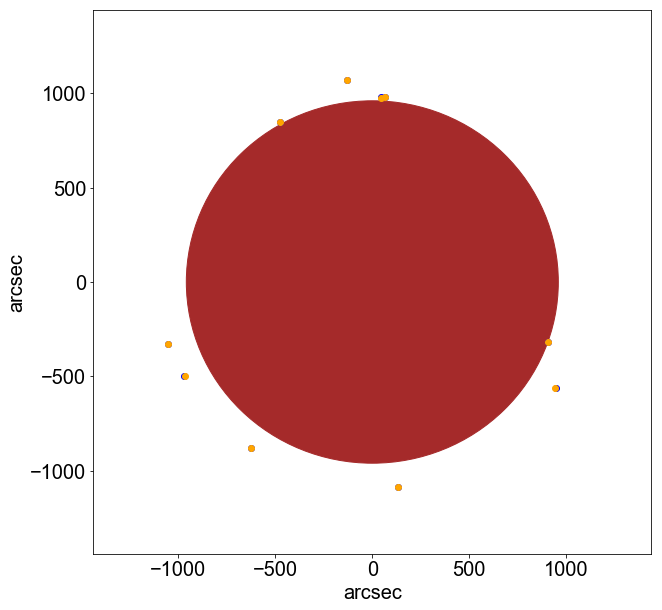

In [198]:
def alpha(m,r):
    return((4.0*const.G/const.c**2*m/r)*u.rad.to('arcsec'))

fig,ax=plt.subplots(1,1,figsize=(10,10))
ns=10
ds=46.0*u.pc
dl=1.0*const.au.to('pc')
r_sun_arcsec=const.R_sun/(const.au.to('m'))*u.rad.to('arcsec')
circle = plt.Circle((0, 0), r_sun_arcsec, color='brown')
ax.add_artist(circle)

# observed positions of the sources
theta=(rn.rand(ns)/4.0+1.0)*const.R_sun.to('pc')/dl*u.rad.to('arcsec')
phi=rn.rand(ns)*2.0*np.pi
theta_1=theta*np.cos(phi)
theta_2=theta*np.sin(phi)

# intrinsic positions of the sources
r=dl.to('m')*theta*u.arcsec.to('rad')
beta=theta-alpha(const.M_sun,r)

beta_1=beta*np.cos(phi)
beta_2=beta*np.sin(phi)
print (alpha(const.M_sun,r))

m=np.ones(n)*const.M_sun.to('kg')
ax.plot(theta_1,theta_2,'o',color='b')
ax.plot(beta_1,beta_2,'o',color='orange')
ax.set_xlim([-r_sun_arcsec*1.5,r_sun_arcsec*1.5])
ax.set_ylim([-r_sun_arcsec*1.5,r_sun_arcsec*1.5])
ax.set_xlabel('arcsec')
ax.set_ylabel('arcsec')

Eddington's measurements were based on seven stars near the solar limb. He measured a deflection of $1.98"\pm0.18"$. Imagine the difficulty of making these measurements with 4" telescope and from a location which can't certainly be considered a photometric site!